In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r'Data/smart_home_device_usage_data.csv')

In [8]:
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


## data description

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,5403.0,2702.000000,1559.856083,1.000000,1351.500000,2702.000000,4052.500000,5403.000000
UsageHoursPerDay,5403.0,12.052992,6.714961,0.501241,6.297871,11.903768,17.791751,23.987326
EnergyConsumption,5403.0,5.054302,2.878941,0.101562,2.524968,5.007047,7.611912,9.998071
UserPreferences,5403.0,0.511753,0.499908,0.000000,0.000000,1.000000,1.000000,1.000000
MalfunctionIncidents,5403.0,2.066445,1.423291,0.000000,1.000000,2.000000,3.000000,4.000000
DeviceAgeMonths,5403.0,30.312234,16.990525,1.000000,15.000000,30.000000,45.000000,59.000000
SmartHomeEfficiency,5403.0,0.376643,0.484589,0.000000,0.000000,0.000000,1.000000,1.000000


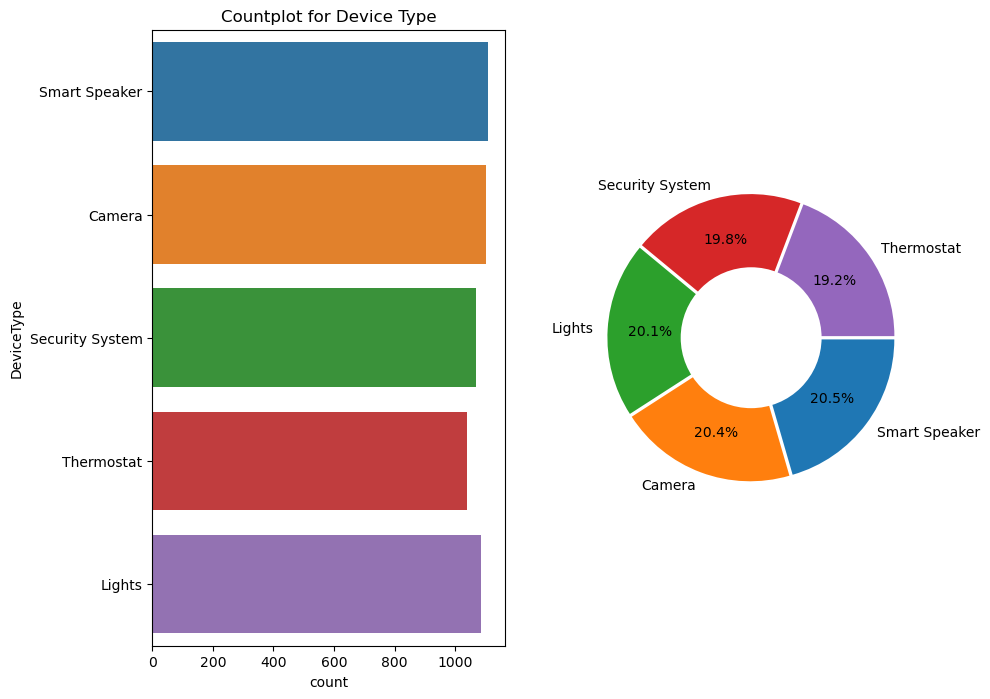

In [36]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(data=data, y= 'DeviceType')
plt.title('Countplot for Device Type')
plt.subplot(1,2,2)
plt.pie(data['DeviceType'].value_counts().values, labels= data['DeviceType'].value_counts().index,
        counterclock= False, autopct= '%.1f%%', explode=[0.02 for x in data['DeviceType'].value_counts().index],
        pctdistance= 0.7)
# draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

In [38]:
num_col = [col for col in data.describe().columns]

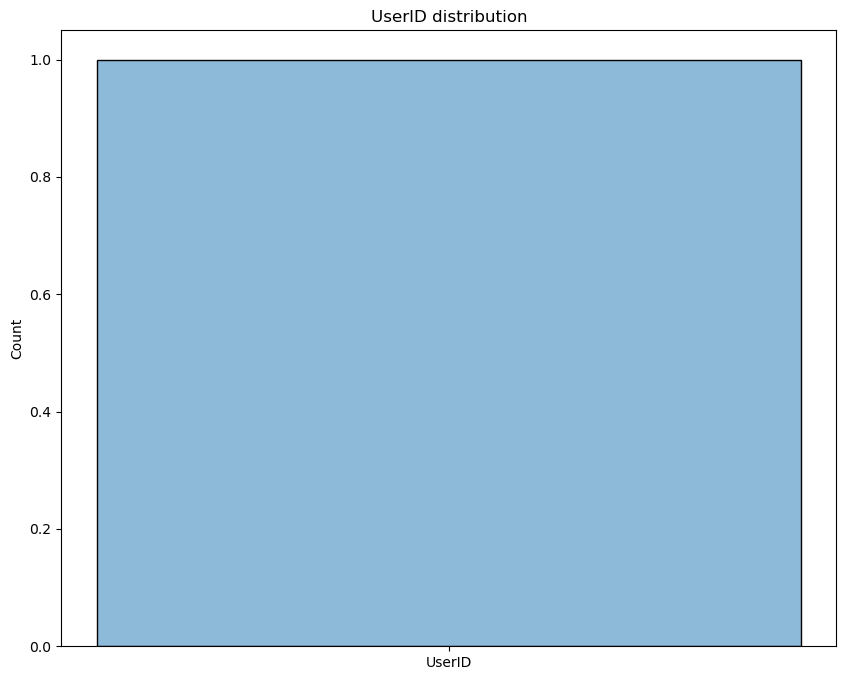

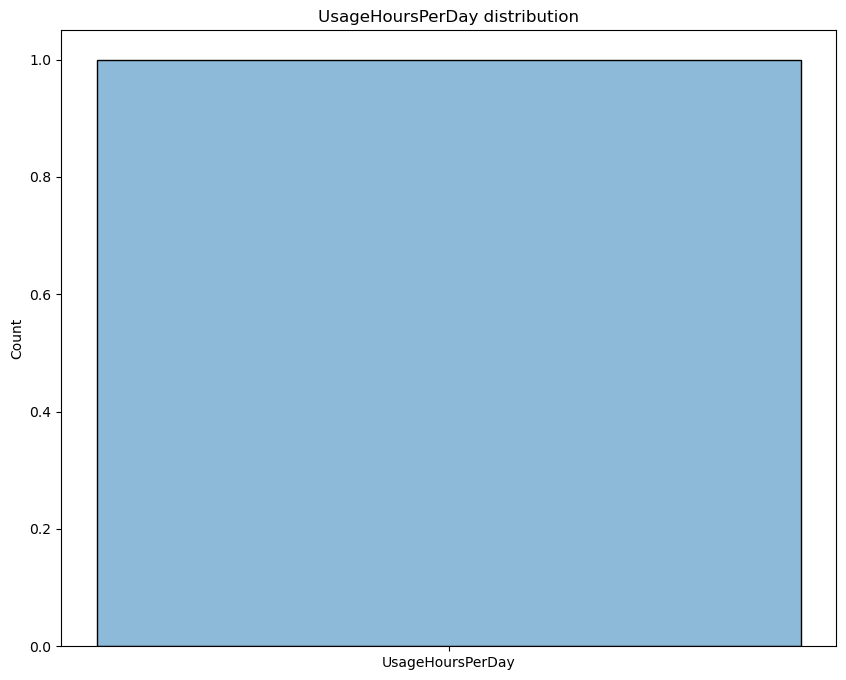

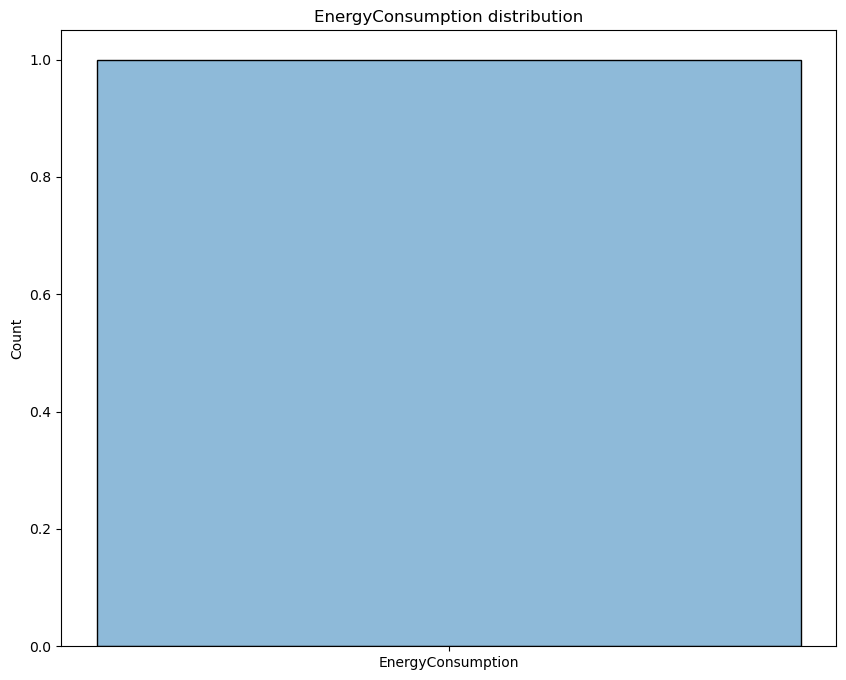

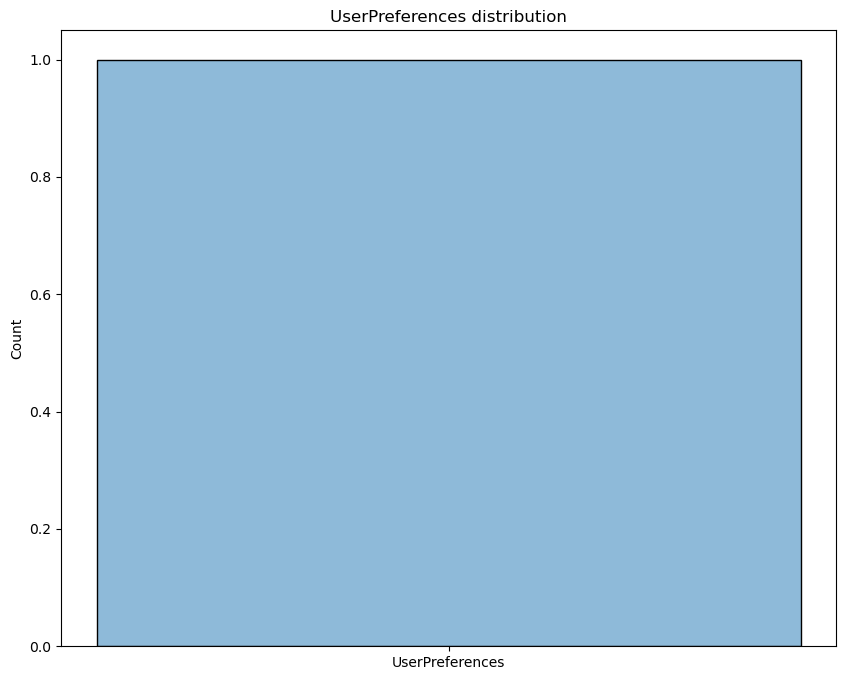

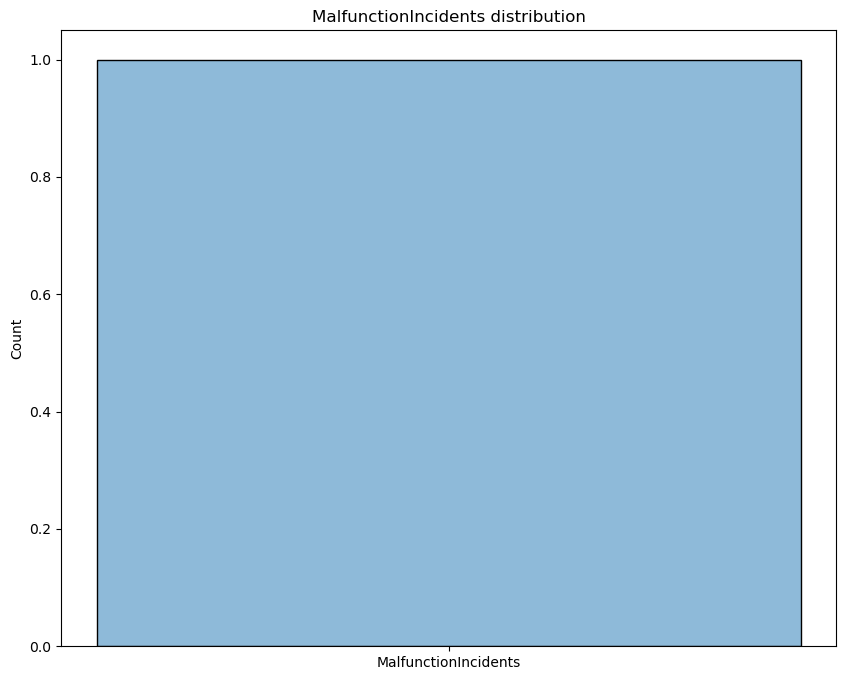

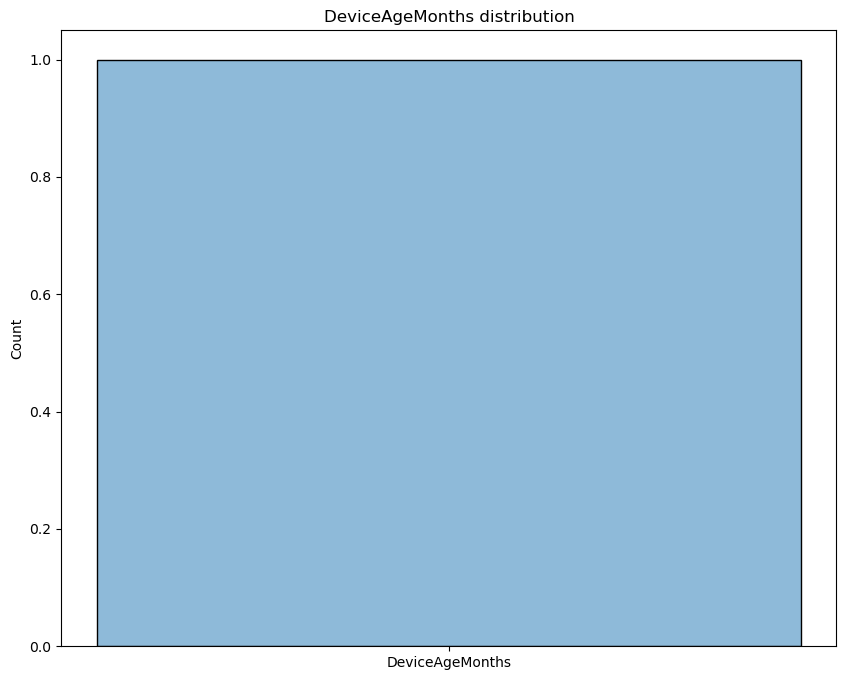

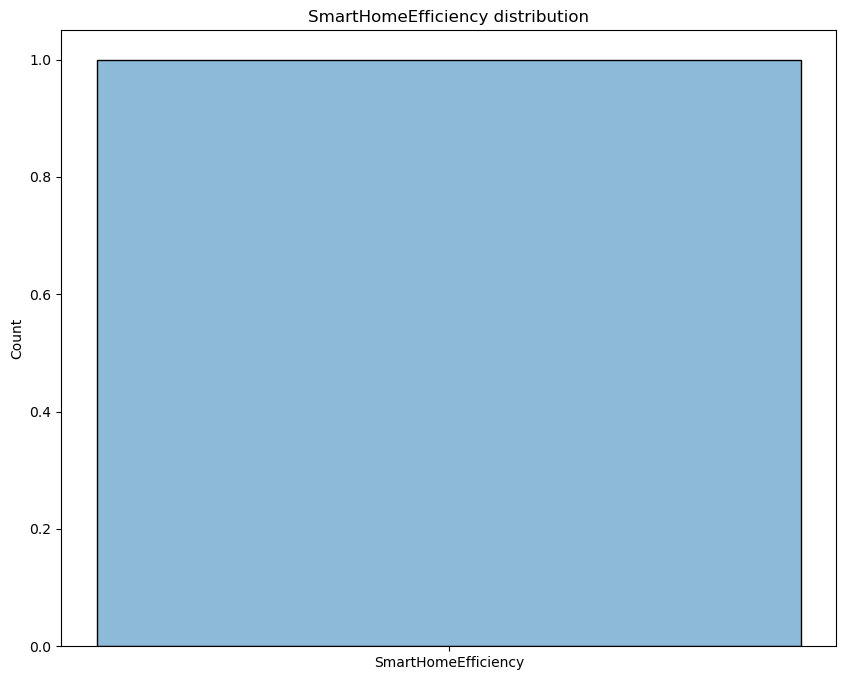

In [41]:
for col in num_col:
    plt.figure(figsize=(10,8))
    sns.histplot(col, kde= True, bins= 20)
    plt.title(f"{col} distribution")
plt.show()